<a href="https://colab.research.google.com/github/asummerz/AI/blob/main/ARIMA_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.shape

(144, 2)

In [6]:
print(df.head(5))

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [7]:
print(df.tail(5))

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


1949년부터 1960년까지 있는데 1개월 단위의 데이터네? 컬럼음 2개고 Month, #Passengers 있고 총 데이터 수는 144개 있음

In [8]:
print(df.isnull().sum())

Month          0
#Passengers    0
dtype: int64


In [9]:
# 시계열 데이터를 일자 단위로 볼 수 있도록 전처리
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format = True)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
# 시간 관련 데이터는 index 처리함
df2 = df.set_index(['Month'])
df2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
print(df2.isnull().sum())

#Passengers    0
dtype: int64


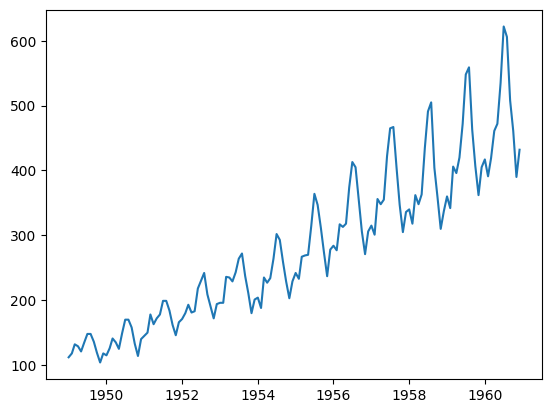

In [13]:
plt.plot(df2)

위 df2 그래프를 보면 추세와 변동성이 확인됨

In [14]:
# 변동폭 조정을 위한 로그 변환
df2_log = np.log(df2)
df2_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


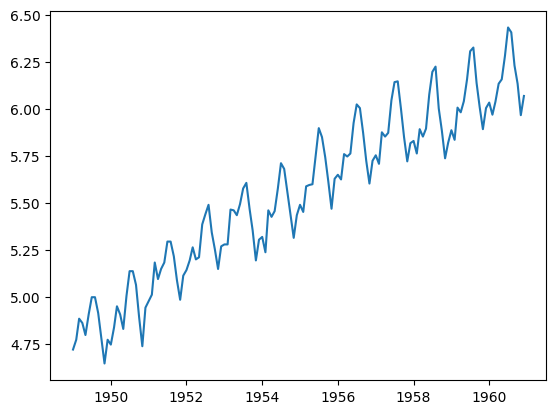

In [15]:
plt.plot(df2_log)

시계열이 정상인지 확인하는 2가지 테스트 rolling statistics, ADCF TEST

In [16]:
# rolling statistics
# 주어진 window 범위 내에서 구함
rol_mean = df2.rolling(window=12).mean()  # 이동평균 => 시계열 데이터의 지정된 window 범위 내에서 평균을 계산함
rol_std = df2.rolling(window=12).std()  # 데이터의 변동성을 측정하는 이동표준편차 => 주어진 window 크기 내에서 데이터의 변동성을 측정하는 지표
print(rol_mean, rol_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


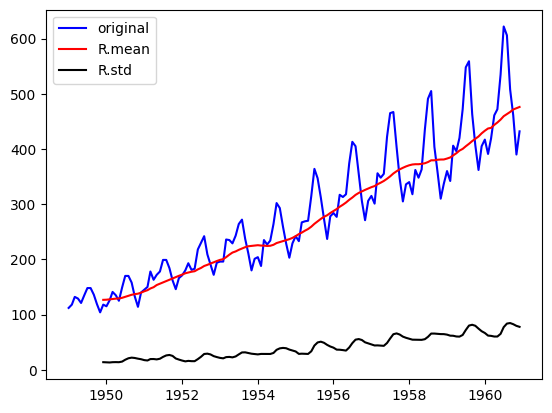

In [17]:
origin = plt.plot(df2, color='blue', label='original')
mean = plt.plot(rol_mean, color='red', label='R.mean')
std = plt.plot(rol_std, color='black', label='R.std')
plt.legend(loc='best')
plt.show(block=False)

stantionary인지 확인하려면 단위근 검정이란걸 해야함\
시계열 데이터에서는 전처리 매우 중요함

In [18]:
# Now Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest=adfuller(df2['#Passengers'], autolag="AIC")
dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])

for key ,value in dftest[4].items():
    dfoutput['critical value (%s)' %key]=value

print(dfoutput)

Test_statistic            0.815369
p-value                   0.991880
#lags-used               13.000000
number_of_obs used      130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


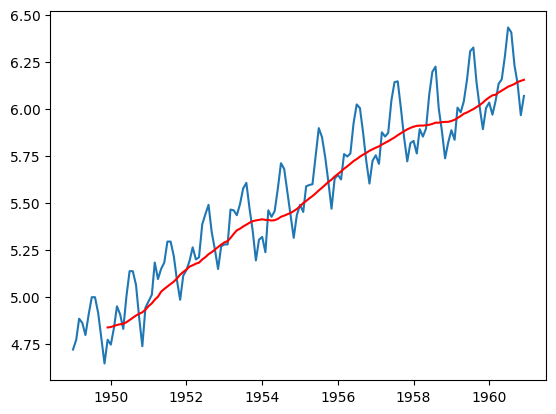

In [19]:
# rolling statistics
moving_avg = df2_log.rolling(window=12).mean()  # 이동평균 => 시계열 데이터의 지정된 window 범위 내에서 평균을 계산함
moving_std = df2_log.rolling(window=12).std()  # 데이터의 변동성을 측정하는 이동표준편차 => 주어진 window 크기 내에서 데이터의 변동성을 측정하는 지표

plt.plot(df2_log)
plt.plot(moving_avg, color='red')

In [20]:
# 차분과 같은 의미로 rolling한 값을 빼줌
df3_logavg = df2_log - moving_avg
df3_logavg.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


NaN 값 제거하는 이유?\
추세와 변동성을 잡기 위해

In [21]:
# NaN 값 제외시킴
df3_logavg.dropna(inplace=True)
df3_logavg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


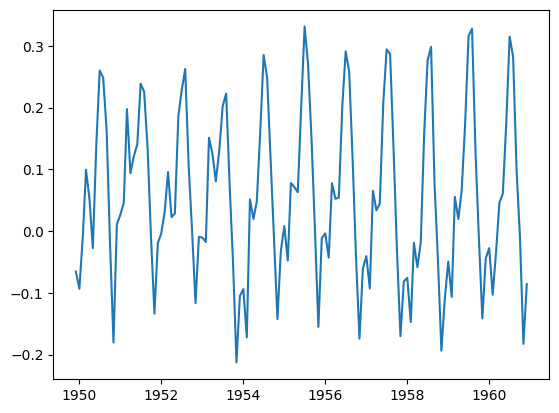

In [22]:
plt.plot(df3_logavg)

위 코드를 함수화하여 정리

In [23]:
def test_stationarity(timeseries):
    movingavg = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()

    dftest=adfuller(timeseries['#Passengers'], autolag="AIC")
    dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])

    for key ,value in dftest[4].items():
        dfoutput['critical value (%s)' %key]=value

    print(dfoutput)

In [24]:
test_stationarity(df3_logavg)

Test_statistic           -3.162908
p-value                   0.022235
#lags-used               13.000000
number_of_obs used      119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

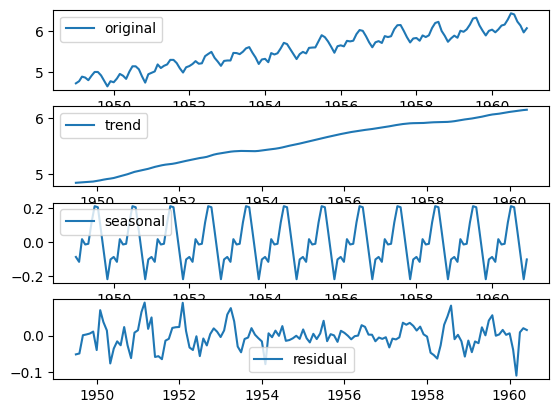

In [26]:
deco=seasonal_decompose(df2_log)

trend=deco.trend
seasonal=deco.seasonal
residual=deco.resid

plt.subplot(411)
plt.plot(df2_log, label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')

plt.show()

residual: trend(추세)와 seasonal(계절성)을 제외한 나머지 요인에 대한 데이터\
위 그래프를 분석하면 우상향 추세를 보이면서 계절성을 띄고 있는 데이터임을 확인할 수 있다.

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(123)

ewm(): 이동평균을 자동으로 구해주는 함수. rolling 대신 사용해도됨

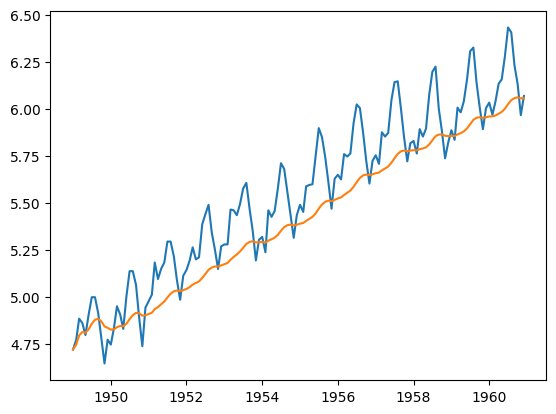

In [28]:
wats=df2_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df2_log)
plt.plot(wats)

Test_statistic           -3.601262
p-value                   0.005737
#lags-used               13.000000
number_of_obs used      130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


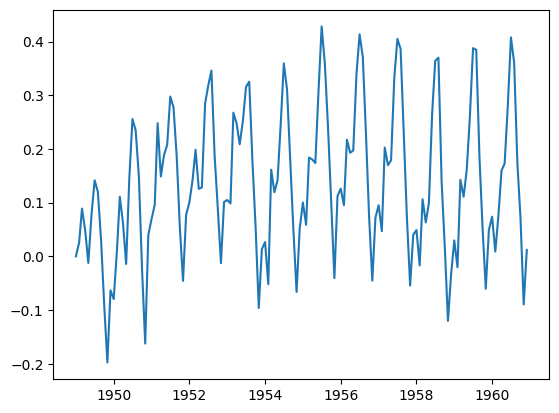

In [29]:
wats2=df2_log-wats
plt.plot(wats2)
test_stationarity(wats2)

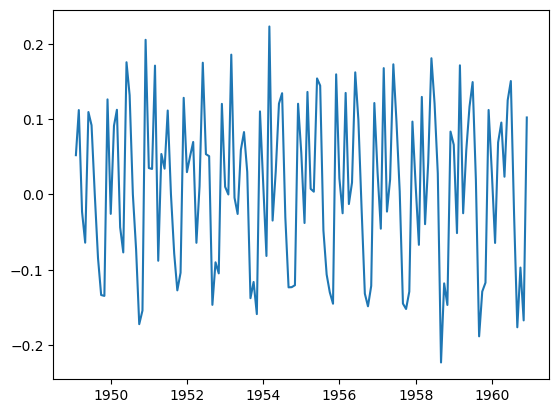

In [30]:
shift=df2_log-df2_log.shift()
plt.plot(shift)

In [31]:
shift.dropna(inplace=True)
test_stationarity(shift)

Test_statistic           -2.717131
p-value                   0.071121
#lags-used               14.000000
number_of_obs used      128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
dtype: float64


In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
np.random.seed(123)

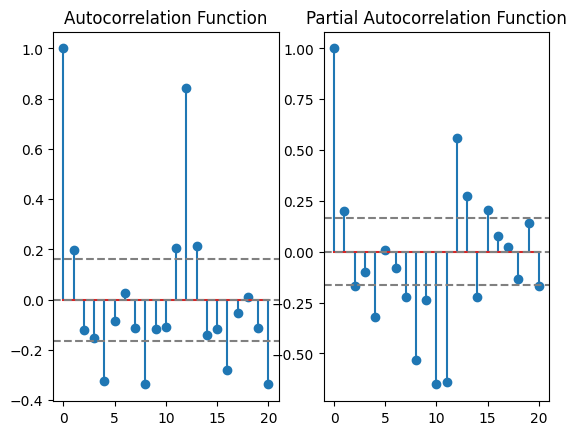

In [33]:
acf, ci = sm.tsa.stattools.acf(shift, nlags=20, alpha=0.05)
pacf, ci = sm.tsa.stattools.pacf(shift, nlags=20, alpha=0.05)

# ACF
plt.subplot(1, 2, 1)
plt.stem(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(1, 2, 2)
plt.stem(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.show()

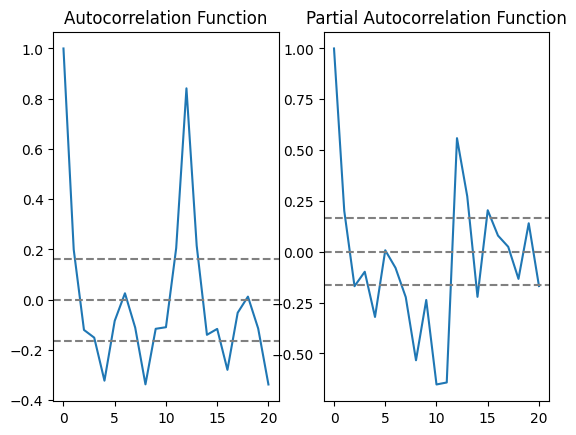

In [34]:
acf, ci = sm.tsa.stattools.acf(shift, nlags=20, alpha=0.05)
pacf, ci = sm.tsa.stattools.pacf(shift, nlags=20, alpha=0.05)

# ACF
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.show()

In [35]:
# ARIMA(p, d, q)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df2_log, order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
